In [1]:
import sys
import os
import pandas as pd
import numpy as np
import random
import scipy
from importlib import reload
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns
import networkx as nx
from scipy import sparse
import hypernetx as hnx
import math
from itertools import product
from itertools import combinations
import warnings
import time
warnings.simplefilter("ignore", category=RuntimeWarning)

source_path = os.path.abspath("../../source/")
sys.path.append(source_path)
import utils as ut
import plotting as plt2
import hypercore as hc
import matrix as matrix
import centrality as central

In [17]:
def generate_core_periphery_hypergraph(num_core_nodes, num_periphery_nodes,
                                      edge_probability_core, edge_probability_periphery,
                                      avg_edge_size, core_periphery_probability):
    """
    This function generates a random hypergraph with a core-periphery structure and creates its binary incidence matrix.

    Args:
      num_core_nodes: Number of nodes in the core.
      num_periphery_nodes: Number of nodes in the periphery.
      edge_probability_core: Probability of an edge forming between core nodes.
      edge_probability_periphery: Probability of an edge forming between periphery nodes.
      avg_edge_size: Average number of nodes per edge.
      core_periphery_probability: Probability of an edge forming between a core node and a periphery node.

    Returns:
      A tuple containing four elements:
          * core_nodes: List of core nodes.
          * periphery_nodes: List of periphery nodes.
          * edges: List of edges.
          * incidence_matrix: Binary incidence matrix as a NumPy array.
    """
    import numpy as np

    # Define core and periphery nodes
    core_nodes = list(range(num_core_nodes))
    periphery_nodes = list(range(num_core_nodes, num_core_nodes + num_periphery_nodes))

    # Get total number of nodes
    total_nodes = len(core_nodes) + len(periphery_nodes)

    # Generate edges
    edges = []
    for _ in range(int(len(core_nodes) * edge_probability_core)):
        # Sample core nodes for an edge
        edge = random.sample(core_nodes, k=int(avg_edge_size))
        edges.append(edge)

    for _ in range(int(len(periphery_nodes) * edge_probability_periphery)):
        # Sample periphery nodes for an edge
        edge = random.sample(periphery_nodes, k=int(avg_edge_size))
        edges.append(edge)

    # Add edges between core and periphery nodes
    for _ in range(int(num_core_nodes * num_periphery_nodes * core_periphery_probability)):
        # Sample a core node and a periphery node
        core_node = random.choice(core_nodes)
        periphery_node = random.choice(periphery_nodes)
        # Create an edge with the core and periphery node
        edge = [core_node, periphery_node]
        # Optionally, you can sample additional nodes for the edge
        if avg_edge_size > 2:
            additional_nodes = random.sample(core_nodes + periphery_nodes, k=int(avg_edge_size) - 2)
            edge.extend(additional_nodes)
            
        edges.append(edge)

    # Create empty matrix
    incidence_matrix = np.zeros((total_nodes, len(edges)), dtype=int)

    # Fill the matrix with 1s for corresponding nodes in each edge
    for i, edge in enumerate(edges):
        for node in edge:
            incidence_matrix[node, i] = 1

    return core_nodes, periphery_nodes, edges, incidence_matrix

# Example usage
num_core_nodes = 5
num_periphery_nodes = 25
edge_probability_core = 0.95
edge_probability_periphery = 0.2
avg_edge_size = 3
core_periphery_probability = 0.1

core_nodes, periphery_nodes, edges, incidence_matrix = generate_core_periphery_hypergraph(
    num_core_nodes, num_periphery_nodes, edge_probability_core, 
    edge_probability_periphery, avg_edge_size, core_periphery_probability)

print(type(incidence_matrix))
H = pd.DataFrame(incidence_matrix)
print(f"{H.shape=}")
H

<class 'numpy.ndarray'>
H.shape=(30, 21)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Plot the Hypergraphs

Text(0.5, 0, 'Hyperedges')

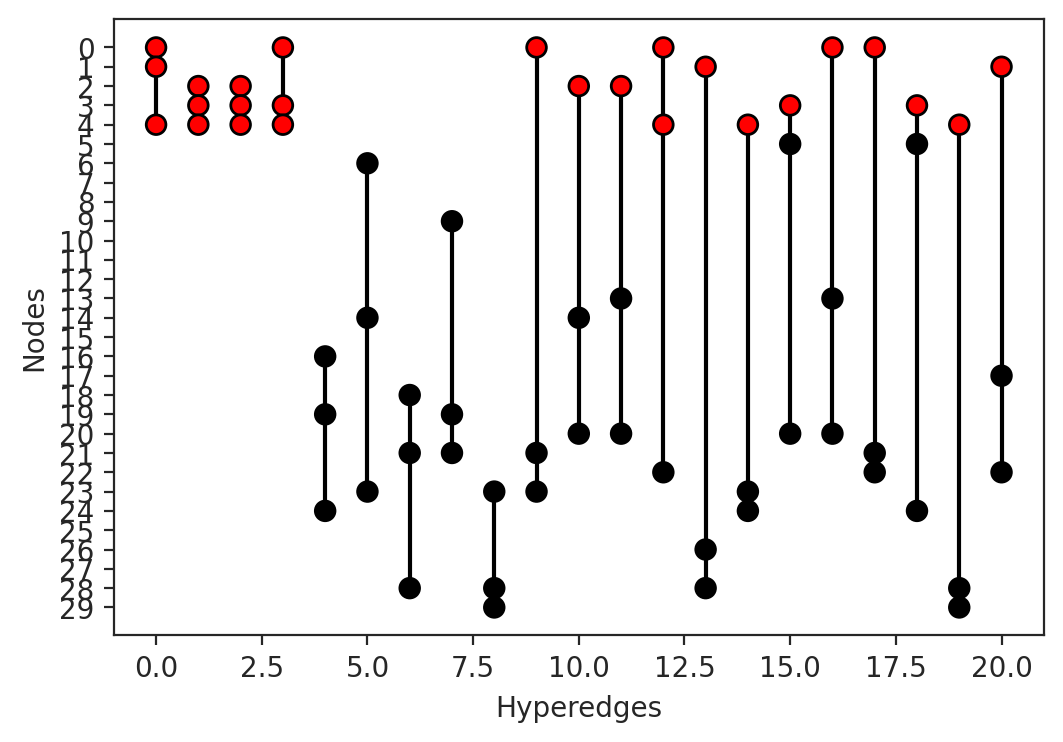

In [18]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 6, 4

for i, column in enumerate(H.columns):
    hyperedge = H[column][H[column] > 0]
    order = len(hyperedge)
    x_ind = np.ones(order) * i
    
    c = np.where(hyperedge.index.isin(core_nodes), 'r', 'k')

    # Plot nodes
    plt.scatter(x_ind, 
                hyperedge.index, 
                s=50,
                c=c, 
                ec='k',
                zorder=3)

    # Plot edges
    plt.plot(x_ind, 
             hyperedge.index,
             c='k') 
    
plt.yticks(range(H.shape[0]))
plt.gca().invert_yaxis()
plt.ylabel('Nodes')
plt.xlabel('Hyperedges')

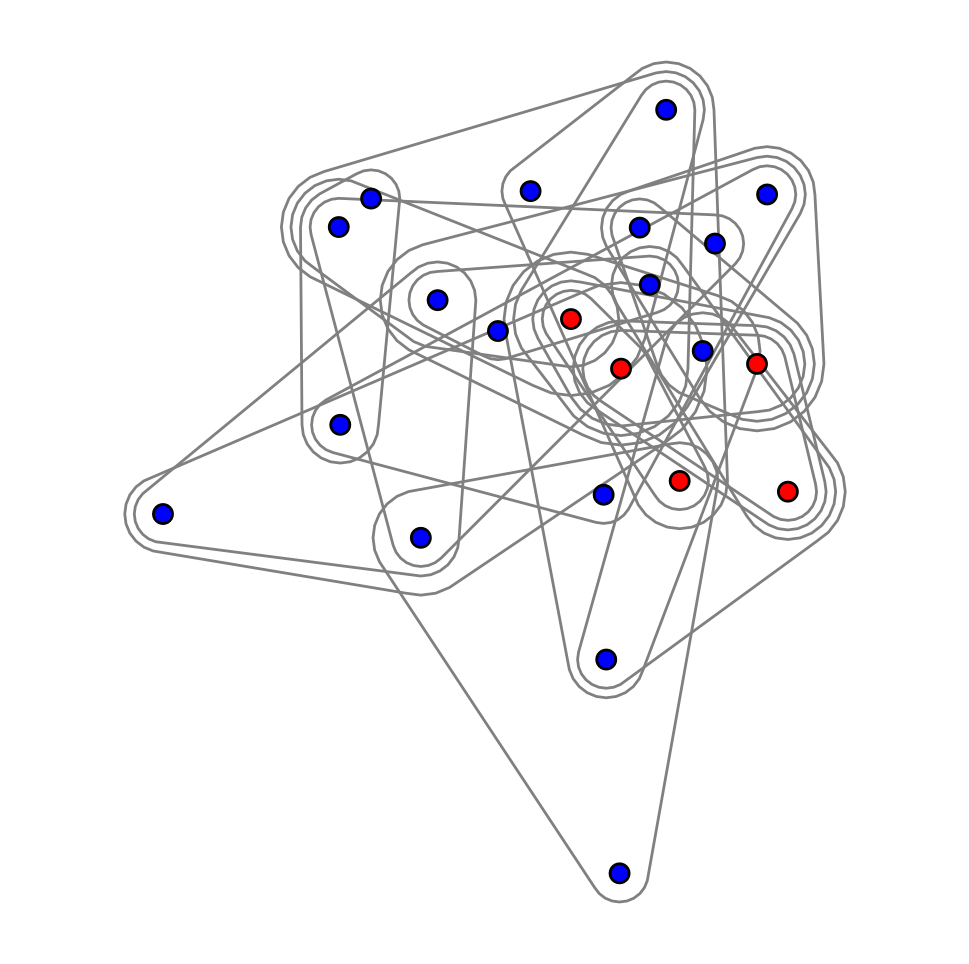

In [19]:
def to_hypernet(H):
    """A function to convert a dataframe into a 
    hypernet hypergrapgh"""
    
    iteractions = {}
    
    for idx, row in H.T.iterrows():
        iteractions[idx] = tuple(row[row == 1].index)

    hx = hnx.Hypergraph(iteractions)
    return hx
    

hx = to_hypernet(H)

def node_color(v):
    if v in core_nodes:
        return 'r'
    else:
        return 'b'

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 6, 6

hnx.drawing.draw(hx, 
                 with_node_counts=False, 
                 with_edge_counts=False,
                 with_edge_labels=False, 
                 with_node_labels=False,
                 nodes_kwargs={'color': node_color, 'edgecolor' : 'k'},
                 edges_kwargs={'edgecolors': 'grey',},
                 layout_kwargs = {'seed': 39},
                )


In [20]:
from itertools import product

def max_integer_in_tuples(tuples_set):
    # Flatten the set of tuples into a single iterable
    flattened_list = [item for tpl in tuples_set for item in tpl]
    
    # Return the maximum value from the flattened list
    return max(flattened_list)


def verify(G, H, f):
#Verifies a possible graph homomorphism f from G to H
   homomorphism = True
   for edge in G:
       if not ((f[edge[0]], f[edge[1]]) in H or (f[edge[1]], f[edge[0]]) in H ):
           homomorphism = False
           break
   return homomorphism

def verify_hypergraph(G, H, f):
    """
    Verifies if a possible hypergraph homomorphism f from hypergraph G to hypergraph H is valid.

    Parameters:
    - G: Set of hyperedges in the source hypergraph G (where each hyperedge is a tuple of vertices)
    - H: Set of hyperedges in the target hypergraph H (where each hyperedge is a tuple of vertices)
    - f: Function representing the homomorphism, mapping vertices in G to vertices in H

    Returns:
    - True if f is a valid hypergraph homomorphism from G to H, False otherwise
    """
    for hyperedge in G:
        # Map the vertices of the hyperedge under the homomorphism
        mapped_hyperedge = tuple(sorted(f[v] for v in hyperedge))
        # Check if the mapped hyperedge exists in the target hypergraph H
        if mapped_hyperedge not in H:
            return False
    return True
'''
def solve(G, H):
#Finds the number of homomorphisms from graph G to graph H and the smallest one
   m = max_integer_in_tuples(G)+1
   n = max_integer_in_tuples(H)+1
   rangeG = [i for i in range(n)]
   assignments = generate_all_tuples(n, m)
   cnt = 0
   possible_assignments = []
   for f in assignments:
       if verify_hypergraph(G, H, f):
           cnt += 1
           possible_assignments.append(f)
   if cnt > 0:
       print(f'Number of homomorphisms {cnt}')
       best = smallest_homomorphism(possible_assignments)
       print(f'The best homomorphism is given by {best}')
       new_set = recover_edges(best, H)
       df_imatrix = create_incidence_matrix_dataframe(new_set)
       print(df_imatrix)
       hx = to_hypernet(df_imatrix)
       plt.rcParams['figure.dpi'] = 200
       plt.rcParams['figure.figsize'] = 6, 6
       hnx.drawing.draw(hx, 
                 with_node_counts=False, 
                 with_edge_counts=False,
                 with_edge_labels=False, 
                 with_node_labels=False,
                 nodes_kwargs={'color': node_color, 'edgecolor' : 'k'},
                 edges_kwargs={'edgecolors': 'grey',},
                 layout_kwargs = {'seed': 39},
                )
   else:
       print('No core exists')
   return cnt
'''

def solve(G, H):
    # Step 1: Determine the size parameters for the tuples
    m = max_integer_in_tuples(G) + 1
    n = max_integer_in_tuples(H) + 1

    # Step 2: Generate all possible assignments
    
    t = time.time()
    assignments = generate_all_tuples(n, m)
    elapsed = time.time() - t
    print(f'Generation Complete: {elapsed} seconds')

    # Step 3: Verify each assignment and collect valid homomorphisms
    t = time.time()
    possible_assignments = [f for f in assignments if verify_hypergraph(G, H, f)]
    cnt = len(possible_assignments)
    elapsed = time.time() - t
    print(f'Homomorphism Validation Complete: {elapsed} seconds')

    if cnt > 0:
        # Step 4: Find the smallest homomorphism
        t = time.time()
        best = smallest_homomorphism(possible_assignments)
        print(f'Number of homomorphisms: {cnt}')
        print(f'The best homomorphism is given by {best}')
        elapsed = time.time() - t
        print(f'Smallest Homomorphism Found: {elapsed} seconds')

        # Step 5: Process the best homomorphism
        t = time.time()
        new_set = recover_edges(best, H)
        df_imatrix = create_incidence_matrix_dataframe(new_set)
        elapsed = time.time() - t
        print(f'Core Found: {elapsed} seconds')

        # Step 6: Visualize the result
        t = time.time()
        hx = to_hypernet(df_imatrix)
        plt.rcParams['figure.dpi'] = 200
        plt.rcParams['figure.figsize'] = (6, 6)
        hnx.drawing.draw(hx, 
                         with_node_counts=False, 
                         with_edge_counts=False,
                         with_edge_labels=False, 
                         with_node_labels=False,
                         nodes_kwargs={'color': node_color, 'edgecolor': 'k'},
                         edges_kwargs={'edgecolors': 'grey'},
                         layout_kwargs={'seed': 39})
        elapsed = time.time() - t
        print(f'Visualization Complete: {elapsed} seconds')
    else:
        print('No core exists')

    return cnt
    
def generate_all_tuples(n, m):
    # Create a range of numbers from 1 to n (or any other set of n distinct numbers)
    numbers = range(0, n)
    
    # Generate all possible tuples of size m with elements from the numbers range
    all_tuples = list(product(numbers, repeat=m))
    
    return all_tuples

def smallest_homomorphism(possible):
    # Initialize with the worst possible size (infinity)
    smallest_size = math.inf
    best_homomorphism = None
    
    for assignment in possible:
        candidate_size = len(set(assignment))
        
        # Update if the current candidate is smaller
        if candidate_size < smallest_size:
            smallest_size = candidate_size
            best_homomorphism = assignment
            
    return best_homomorphism

def get_combinations_as_tuples(tuples_set, combination_size):
    # Convert the set to a list to use combinations
    tuples_list = list(tuples_set)
    
    # Generate all possible combinations of the specified size
    all_combinations = combinations(tuples_list, combination_size)
    
    # Convert each combination to a tuple and return as a list of tuples
    return set([tuple(comb) for comb in all_combinations])

def recover_edges(result, original_edges):
    # Convert original_edges to a set for faster lookup
    original_edges_set = set(map(tuple, map(sorted, original_edges)))
    
    compression = set(result)
    largest_edge_size = max(map(len, original_edges), default=0)
    
    # Generate all combinations of the desired size
    all_combinations = get_combinations_as_tuples(compression, largest_edge_size)
    
    # Convert all combinations to a set of sorted tuples for efficient lookup
    real_combinations = {tuple(sorted(tpl)) for tpl in all_combinations}
    
    # Use list comprehension for more concise and potentially faster execution
    new_edge_list = [comb for comb in real_combinations if comb in original_edges_set]
    
    return new_edge_list
    
'''
def recover_edges(result, original_edges):
    compression = set(result)
    largest_edge_size = max(map(len, original_edges), default=0)
    all_combinations = get_combinations_as_tuples(compression, largest_edge_size)
    print(all_combinations)
    real_combinations = {tuple(sorted(tpl)) for tpl in all_combinations}
    new_edge_list = []
    for comb in real_combinations:
        if comb in original_edges:
            print(f'combination found: {comb}')
            new_edge_list.append(comb)
    return new_edge_list
'''
    
def create_graph(edge_set):
    G = nx.Graph()
    G.add_edges_from(edge_set)
    nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=16)
    plt.show()

def incidence_matrix_to_hyperedges(matrix):
    # Convert the incidence matrix to a numpy array for easier manipulation
    #matrix = np.array(incidence_matrix)
    
    # List to hold the hyperedges as tuples of vertices
    hyperedges = set()
    
    # Number of vertices and hyperedges
    num_vertices, num_hyperedges = matrix.shape
    
    # Loop through each hyperedge (column)
    for hyperedge_index in range(num_hyperedges):
        # Find vertices incident to this hyperedge
        vertices = np.where(matrix[:, hyperedge_index] == 1)[0]
        
        # Create a sorted tuple of vertices for the hyperedge
        if len(vertices) > 0:
            hyperedge = tuple(sorted(vertices))
            hyperedges.add(hyperedge)
    
    return hyperedges


def reduce_tuples(tuples_set):
    # Step 1: Extract all unique numbers
    unique_numbers = set()
    for tpl in tuples_set:
        unique_numbers.update(tpl)
    
    # Step 2: Create a mapping from original numbers to smallest integers
    sorted_numbers = sorted(unique_numbers)
    number_mapping = {num: idx for idx, num in enumerate(sorted_numbers)}
    
    # Step 3: Apply the mapping to each tuple
    reduced_tuples = {tuple(number_mapping[num] for num in tpl) for tpl in tuples_set}
    
    return reduced_tuples


def create_incidence_matrix_dataframe(hyperedges):
    # Step 1: Extract all unique vertices and hyperedges
    unique_vertices = sorted(set(v for hyperedge in hyperedges for v in hyperedge))
    unique_hyperedges = sorted(hyperedges)
    
    # Create a mapping from vertices to rows
    vertex_index = {v: i for i, v in enumerate(unique_vertices)}
    
    # Create a mapping from hyperedges to columns
    hyperedge_index = {he: j for j, he in enumerate(unique_hyperedges)}
    
    # Initialize the incidence matrix
    incidence_matrix = np.zeros((len(unique_vertices), len(unique_hyperedges)), dtype=int)
    
    # Fill the incidence matrix
    for hyperedge in unique_hyperedges:
        col = hyperedge_index[hyperedge]
        for vertex in hyperedge:
            row = vertex_index[vertex]
            incidence_matrix[row, col] = 1
    
    # Create a DataFrame from the incidence matrix
    df = pd.DataFrame(incidence_matrix, index=unique_vertices, columns=[str(he) for he in unique_hyperedges])
    
    return df


def to_hypernet(H):
    """A function to convert a dataframe into a 
    hypernet hypergrapgh"""
    
    iteractions = {}
    
    for idx, row in H.T.iterrows():
        iteractions[idx] = tuple(row[row == 1].index)

    hx = hnx.Hypergraph(iteractions)
    return hx
    


def node_color(v):
    if v in core_nodes:
        return 'r'
    else:
        return 'b'





In [21]:

t = time.time()
G = incidence_matrix_to_hyperedges(incidence_matrix)
print(G)
elapsed = time.time() - t
print(f'Search took {elapsed} seconds')



{(0, 13, 20), (4, 28, 29), (3, 5, 24), (2, 13, 20), (6, 14, 23), (9, 19, 21), (0, 4, 22), (3, 5, 20), (0, 21, 23), (1, 17, 22), (1, 26, 28), (2, 14, 20), (0, 1, 4), (23, 28, 29), (0, 3, 4), (18, 21, 28), (0, 21, 22), (4, 23, 24), (2, 3, 4), (16, 19, 24)}
Search took 0.0003719329833984375 seconds


In [22]:
t2 = time.time()
G2 = reduce_tuples(G)
print(G2)
elapsed2 = time.time() - t2
print(f'Search took {elapsed2} seconds')

{(17, 20, 21), (0, 15, 17), (2, 9, 14), (3, 5, 18), (10, 13, 18), (12, 15, 20), (0, 8, 14), (7, 13, 15), (4, 20, 21), (1, 19, 20), (1, 11, 16), (2, 8, 14), (0, 4, 16), (0, 15, 16), (6, 9, 17), (3, 5, 14), (4, 17, 18), (0, 1, 4), (0, 3, 4), (2, 3, 4)}
Search took 0.00011658668518066406 seconds


In [ ]:
t3 = time.time()
solve(G2,G2)
elapsed3 = time.time() - t3
print(f'Search took {elapsed3} seconds')

In [16]:
len(generate_all_tuples(5, 5))

3125

In [ ]:
break

# Graph Homomorphisms

In [ ]:
from itertools import product

def max_integer_in_tuples(tuples_set):
    # Flatten the set of tuples into a single iterable
    flattened_list = [item for tpl in tuples_set for item in tpl]
    
    # Return the maximum value from the flattened list
    return max(flattened_list)


def verify(G, H, f):
#Verifies a possible graph homomorphism f from G to H
   homomorphism = True
   for edge in G:
       if not ((f[edge[0]], f[edge[1]]) in H or (f[edge[1]], f[edge[0]]) in H ):
           homomorphism = False
           break
   return homomorphism

def verify_hypergraph(G, H, f):
    """
    Verifies if a possible hypergraph homomorphism f from hypergraph G to hypergraph H is valid.

    Parameters:
    - G: Set of hyperedges in the source hypergraph G (where each hyperedge is a tuple of vertices)
    - H: Set of hyperedges in the target hypergraph H (where each hyperedge is a tuple of vertices)
    - f: Function representing the homomorphism, mapping vertices in G to vertices in H

    Returns:
    - True if f is a valid hypergraph homomorphism from G to H, False otherwise
    """
    for hyperedge in G:
        # Map the vertices of the hyperedge under the homomorphism
        mapped_hyperedge = tuple(sorted(f[v] for v in hyperedge))
        # Check if the mapped hyperedge exists in the target hypergraph H
        if mapped_hyperedge not in H:
            return False
    return True
'''
def solve(G, H):
#Finds the number of homomorphisms from graph G to graph H and the smallest one
   m = max_integer_in_tuples(G)+1
   n = max_integer_in_tuples(H)+1
   rangeG = [i for i in range(n)]
   assignments = generate_all_tuples(n, m)
   cnt = 0
   possible_assignments = []
   for f in assignments:
       if verify_hypergraph(G, H, f):
           cnt += 1
           possible_assignments.append(f)
   if cnt > 0:
       print(f'Number of homomorphisms {cnt}')
       best = smallest_homomorphism(possible_assignments)
       print(f'The best homomorphism is given by {best}')
       new_set = recover_edges(best, H)
       df_imatrix = create_incidence_matrix_dataframe(new_set)
       print(df_imatrix)
       hx = to_hypernet(df_imatrix)
       plt.rcParams['figure.dpi'] = 200
       plt.rcParams['figure.figsize'] = 6, 6
       hnx.drawing.draw(hx, 
                 with_node_counts=False, 
                 with_edge_counts=False,
                 with_edge_labels=False, 
                 with_node_labels=False,
                 nodes_kwargs={'color': node_color, 'edgecolor' : 'k'},
                 edges_kwargs={'edgecolors': 'grey',},
                 layout_kwargs = {'seed': 39},
                )
   else:
       print('No core exists')
   return cnt
'''

def solve(G, H):
    # Step 1: Determine the size parameters for the tuples
    m = max_integer_in_tuples(G) + 1
    n = max_integer_in_tuples(H) + 1

    # Step 2: Generate all possible assignments
    assignments = generate_all_tuples(n, m)
    
    # Step 3: Verify each assignment and collect valid homomorphisms
    possible_assignments = [f for f in assignments if verify_hypergraph(G, H, f)]
    cnt = len(possible_assignments)

    if cnt > 0:
        # Step 4: Find the smallest homomorphism
        best = smallest_homomorphism(possible_assignments)
        print(f'Number of homomorphisms: {cnt}')
        print(f'The best homomorphism is given by {best}')

        # Step 5: Process the best homomorphism
        new_set = recover_edges(best, H)
        df_imatrix = create_incidence_matrix_dataframe(new_set)

        # Step 6: Visualize the result
        hx = to_hypernet(df_imatrix)
        plt.rcParams['figure.dpi'] = 200
        plt.rcParams['figure.figsize'] = (6, 6)
        hnx.drawing.draw(hx, 
                         with_node_counts=False, 
                         with_edge_counts=False,
                         with_edge_labels=False, 
                         with_node_labels=False,
                         nodes_kwargs={'color': 'lightblue', 'edgecolor': 'k'},
                         edges_kwargs={'edgecolors': 'grey'},
                         layout_kwargs={'seed': 39})
    else:
        print('No core exists')

    return cnt
    
def generate_all_tuples(n, m):
    # Create a range of numbers from 1 to n (or any other set of n distinct numbers)
    numbers = range(0, n)
    
    # Generate all possible tuples of size m with elements from the numbers range
    all_tuples = list(product(numbers, repeat=m))
    
    return all_tuples

def smallest_homomorphism(possible):
    # Initialize with the worst possible size (infinity)
    smallest_size = math.inf
    best_homomorphism = None
    
    for assignment in possible:
        candidate_size = len(set(assignment))
        
        # Update if the current candidate is smaller
        if candidate_size < smallest_size:
            smallest_size = candidate_size
            best_homomorphism = assignment
            
    return best_homomorphism

def get_combinations_as_tuples(tuples_set, combination_size):
    # Convert the set to a list to use combinations
    tuples_list = list(tuples_set)
    
    # Generate all possible combinations of the specified size
    all_combinations = combinations(tuples_list, combination_size)
    
    # Convert each combination to a tuple and return as a list of tuples
    return set([tuple(comb) for comb in all_combinations])

def recover_edges(result, original_edges):
    # Convert original_edges to a set for faster lookup
    original_edges_set = set(map(tuple, map(sorted, original_edges)))
    
    compression = set(result)
    largest_edge_size = max(map(len, original_edges), default=0)
    
    # Generate all combinations of the desired size
    all_combinations = get_combinations_as_tuples(compression, largest_edge_size)
    
    # Convert all combinations to a set of sorted tuples for efficient lookup
    real_combinations = {tuple(sorted(tpl)) for tpl in all_combinations}
    
    # Use list comprehension for more concise and potentially faster execution
    new_edge_list = [comb for comb in real_combinations if comb in original_edges_set]
    
    return new_edge_list
    
'''
def recover_edges(result, original_edges):
    compression = set(result)
    largest_edge_size = max(map(len, original_edges), default=0)
    all_combinations = get_combinations_as_tuples(compression, largest_edge_size)
    print(all_combinations)
    real_combinations = {tuple(sorted(tpl)) for tpl in all_combinations}
    new_edge_list = []
    for comb in real_combinations:
        if comb in original_edges:
            print(f'combination found: {comb}')
            new_edge_list.append(comb)
    return new_edge_list
'''
    
def create_graph(edge_set):
    G = nx.Graph()
    G.add_edges_from(edge_set)
    nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=16)
    plt.show()

def incidence_matrix_to_hyperedges(matrix):
    # Convert the incidence matrix to a numpy array for easier manipulation
    #matrix = np.array(incidence_matrix)
    
    # List to hold the hyperedges as tuples of vertices
    hyperedges = set()
    
    # Number of vertices and hyperedges
    num_vertices, num_hyperedges = matrix.shape
    
    # Loop through each hyperedge (column)
    for hyperedge_index in range(num_hyperedges):
        # Find vertices incident to this hyperedge
        vertices = np.where(matrix[:, hyperedge_index] == 1)[0]
        
        # Create a sorted tuple of vertices for the hyperedge
        if len(vertices) > 0:
            hyperedge = tuple(sorted(vertices))
            hyperedges.add(hyperedge)
    
    return hyperedges


def reduce_tuples(tuples_set):
    # Step 1: Extract all unique numbers
    unique_numbers = set()
    for tpl in tuples_set:
        unique_numbers.update(tpl)
    
    # Step 2: Create a mapping from original numbers to smallest integers
    sorted_numbers = sorted(unique_numbers)
    number_mapping = {num: idx for idx, num in enumerate(sorted_numbers)}
    
    # Step 3: Apply the mapping to each tuple
    reduced_tuples = {tuple(number_mapping[num] for num in tpl) for tpl in tuples_set}
    
    return reduced_tuples


def create_incidence_matrix_dataframe(hyperedges):
    # Step 1: Extract all unique vertices and hyperedges
    unique_vertices = sorted(set(v for hyperedge in hyperedges for v in hyperedge))
    unique_hyperedges = sorted(hyperedges)
    
    # Create a mapping from vertices to rows
    vertex_index = {v: i for i, v in enumerate(unique_vertices)}
    
    # Create a mapping from hyperedges to columns
    hyperedge_index = {he: j for j, he in enumerate(unique_hyperedges)}
    
    # Initialize the incidence matrix
    incidence_matrix = np.zeros((len(unique_vertices), len(unique_hyperedges)), dtype=int)
    
    # Fill the incidence matrix
    for hyperedge in unique_hyperedges:
        col = hyperedge_index[hyperedge]
        for vertex in hyperedge:
            row = vertex_index[vertex]
            incidence_matrix[row, col] = 1
    
    # Create a DataFrame from the incidence matrix
    df = pd.DataFrame(incidence_matrix, index=unique_vertices, columns=[str(he) for he in unique_hyperedges])
    
    return df


def to_hypernet(H):
    """A function to convert a dataframe into a 
    hypernet hypergrapgh"""
    
    iteractions = {}
    
    for idx, row in H.T.iterrows():
        iteractions[idx] = tuple(row[row == 1].index)

    hx = hnx.Hypergraph(iteractions)
    return hx
    


def node_color(v):
    if v in core_nodes:
        return 'r'
    else:
        return 'b'





In [ ]:
# Example usage
hyperedges = {(0, 1, 2), (2, 3, 4), (4, 5)}
df_incidence_matrix = create_incidence_matrix_dataframe(hyperedges)
print(df_incidence_matrix)


In [ ]:
result = (3, 2, 3, 2)
H = {(0, 1), (1, 0), (1, 2), (2, 1), (2, 3), (3, 2)}
edge_set = recover_edges(result, H)
create_graph(edge_set)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define a set of tuples representing edges
edges = {(0, 1), (1, 2), (2, 3), (3, 4), (4,0)}
edges2 = {(0,1),(1,2),(2,0)}
# Create an empty graph
G = nx.Graph()
G2 = nx.Graph()
# Add edges to the graph
G.add_edges_from(edges)
G2.add_edges_from(edges2)
# Draw the graph
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=16)
nx.draw(G2, with_labels=True, node_color='red', edge_color='gray', node_size=500, font_size=16)
plt.show()


In [ ]:
solve(edges, edges2)

In [ ]:
G = {(0, 1), (1, 0), (0, 2), (2, 0), (0, 3), (3, 0)}
H = {(0, 1), (1, 0), (1, 2), (2, 1), (2, 3), (3, 2)}
solve(G,G)

In [ ]:
#K3
edges = {(0,1), (0,3), (0,5), (2,1), (2,3), (2,5), (4,1), (4,3), (4,5)}

# Create an empty graph
G = nx.Graph()
# Add edges to the graph
G.add_edges_from(edges)
# Draw the graph
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=16)
plt.show()

solve(edges,edges)

# Hypergraph Homomorphisms

In [ ]:
import numpy as np



# Example usage
incidence_matrix = [
    [1, 1, 0],
    [1, 0, 1],
    [0, 0, 0],
    [0, 1, 1]
]
incidence_matrix = np.array(incidence_matrix)

hyperedges_set = incidence_matrix_to_hyperedges(incidence_matrix)
print(hyperedges_set) 
solve(hyperedges_set, hyperedges_set)


# Compute nonlinear node centrality

In [ ]:
ncent, ecent = central.nonlinear_eigenvector_centrality(H.to_numpy(), 
                                                        function='linear', 
                                                        maxiter=1000)

colors = plt2.floats_to_colors(ncent, colormap='Reds')


def node_color(v):
    return colors[v, :]


plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 6, 6

hnx.drawing.draw(hx, 
                 with_node_counts=False, 
                 with_edge_counts=False,
                 with_edge_labels=False, 
                 with_node_labels=False,
                 nodes_kwargs={'color': node_color, 'ec' : 'k'},
                 edges_kwargs={'edgecolors': 'grey',},
                 layout_kwargs = {'seed': 39},
                )

In [ ]:
break

In [ ]:
ncent, ecent = central.nonlinear_eigenvector_centrality(H.to_numpy(), 
                                                        function='linear', 
                                                        maxiter=1000)

colors = plt2.floats_to_colors(ecent, colormap='Reds')

def node_color(v):
    if v in core_nodes:
        return 'r'
    else:
        return 'b'

def edge_color(v):
    return colors[v, :]


plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 6, 6

hnx.drawing.draw(hx, 
                 with_node_counts=False, 
                 with_edge_counts=False,
                 with_edge_labels=False, 
                 with_node_labels=False,
                 nodes_kwargs={'color': node_color, 'ec' : 'k'},
                 edges_kwargs={'edgecolors': edge_color},
                 layout_kwargs = {'seed': 39},
                )

In [ ]:
n_bins = 10
print(f"{H.shape=}")

res = []

for n_t in np.linspace(0, 1, n_bins):
    for e_t in np.linspace(0, 1, n_bins):
        node_idx = np.argwhere(ncent > n_t).ravel()
        edge_idx = np.argwhere(ecent > e_t).ravel()
        
        core = H.iloc[node_idx][edge_idx]
        # Check for empty core
        if core.empty:
            continue  # Skip this iteration if the core is empty
            
        nn, mm = core.shape

        # Minimum core size check
        if (nn > 2) & (mm > 2):
            L = matrix.hypergraph_laplacian(core)
            Lnorm = matrix.normalized_hypergraph_laplacian(core)

            # metrics
            fiedler_number = matrix.estimate_fiedler(Lnorm)
            entropy = matrix.hypergraph_entropy(L)
        else:
            fiedler_number = 0

        row = {
            'node_threshold': n_t,
            'edge_threshold': e_t,
            'n_nodes': nn,
            'n_edges': mm,
            'fiedler_number': fiedler_number,
            'entropy' : entropy,
        }
        res.append(row)
            
res = pd.DataFrame(res)
res.head()


In [ ]:
?hnx.drawing.draw

In [ ]:
def plot_core_periphery_networkx(core_nodes, periphery_nodes, edges):
    """
    This function plots a core-periphery network using NetworkX for layout and Matplotlib for visualization.

    Args:
      core_nodes: List of core nodes.
      periphery_nodes: List of periphery nodes.
      edges: List of lists, where each inner list represents an edge in the hypergraph.
    """
    plt.figure(figsize=(8, 6))

    # Create a NetworkX graph
    G = nx.Graph()

    # Add nodes with color distinction for core and periphery
    G.add_nodes_from(core_nodes, color='red')
    G.add_nodes_from(periphery_nodes, color='blue')

    # Add edges
    for edge in edges:
        for i in range(len(edge) - 1):
            G.add_edge(edge[i], edge[i + 1])

    # Use a layout algorithm for node positioning (adjust as needed)
    pos = nx.spring_layout(G)

    # Draw the graph with node colors and positions
    nx.draw_networkx_nodes(G, pos, nodelist=periphery_nodes, node_color='blue', node_size=150, edgecolors='k')
    nx.draw_networkx_nodes(G, pos, nodelist=core_nodes, node_color='red', node_size=350, edgecolors='k')
    nx.draw_networkx_edges(G, pos, alpha=0.7, width=1.5)

    # Labels and title
    plt.axis('off')
    plt.show()
    
plt.rcParams['figure.dpi'] = 200
plot_core_periphery_networkx(core_nodes, periphery_nodes, edges)

In [ ]:
break